In [2]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def plot_z_distribution( cats = None, labels = None, zlabel = 'Z', suffix = 'test' ):
    
    import matplotlib.pyplot as plt
    z_bin, s = np.linspace(1e-5, 1.0, 200, retstep=True)
    z_center = z_bin[:-1]+s/2.
    
    fig, axes = plt.subplots( 1, 1, figsize = (8,5))
    N, _= np.histogram(cats[zlabel], bins = z_bin)
    
    #n = N/ST82Maparea

    axes.bar(z_center, N, s, color='b' )
    axes.set_xlabel('photo_z')
    axes.set_ylabel('n(z)')
    #ax.set_yscale('log')
    axes.legend(loc='best')

    axes.set_title('\nredshift histogram')
    figname ='figure/hist_z_'+suffix+'.png'
    fig.savefig(figname)
    print 'saving fig to ',figname
    
    #DAT = np.column_stack((z_center, n))
    #filename = 'data_txt/z_distribution_'+suffix+'.txt'
    #np.savetxt(filename, DAT, header = 'z, n(z)')
    #print 'saving data to ',filename

In [3]:
"""
# calling map 
GoldMask = callingEliGoldMask()
GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix
"""

"\n# calling map \nGoldMask = callingEliGoldMask()\nGoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)\nGoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]\n\npixarea = hp.nside2pixarea( 4096, degrees = True)\nsptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )\nst82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )\nSPTMaparea = pixarea * sptnpix\nST82Maparea = pixarea * st82npix\n"

In [9]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_sgc = esutil.io.read(path+'galaxy_DR12v5_CMASS_South.fits.gz')
#cmass_sgc_zcut = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
random_sgc = esutil.io.read(path+'random0_DR12v5_CMASS_South.fits.gz')
#random_sgc_zcut = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.7)]

In [12]:
cmass_sgc = Cuts.SpatialCuts(cmass_sgc, ra=0, ra2=50, dec=-180, dec2=180)
random_sgc = Cuts.SpatialCuts(random_sgc, ra=0, ra2=50, dec=-180, dec2=180)

Spatial Cut  128183
Spatial Cut  6350534


In [13]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
print 'Calculate comoving distance with FlatLambdaCDM cosmology \nH0=70, Om0=0.3'
sys.stdout.flush()

h = 0.7
r = cosmo.comoving_distance(cmass_sgc['Z']).value *h
r_rand = cosmo.comoving_distance(random_sgc['Z']).value *h

Calculate comoving distance with FlatLambdaCDM cosmology 
H0=70, Om0=0.3


In [14]:
#import numpy.lib.recfuctions as rf
from numpy.lib import recfunctions as rf
print 'Adding Comoving distance column'
sys.stdout.flush()
cmass_sgc = rf.append_fields( cmass_sgc, 'DC', data = r )
random_sgc = rf.append_fields( random_sgc, 'DC', data = r_rand )

Adding Comoving distance column


In [15]:
cmass_sgc_zcut = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
random_sgc_zcut = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.7)]

In [ ]:
#tree corr
from systematics_module.corr import correlation_function_3d

correlation_function_3d(data = cmass_sgc, rand = random_sgc, zlabel='Z', weight = None, njack = 30, suffix = 'cmass_sgc', out = None)
#correlation_function_3d(data = cmass_sgc_zcut, rand = rand_sgc_zcut, zlabel='Z', weight = None, njack = 30, suffix = 'cmass_sgc_zcut', out = None)
#w_sgc = cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_rand = random_sgc['WEIGHT_FKP']
#data = angular_correlation(data = cmass_sgc, rand = random_sgc, njack = 30, weight = [w_sgc, w_rand], suffix = '_cmass_sgc_noz', out = None)

calculate 3d correlation function
JK sampling
X (716, 2)  centers (30, 2)  tol=1e-05  maxiter=200
17 iterations  cluster sizes: [10 20 22 15 25 21 38 22 10 23 19 32 22 23 38 31 29 22 24 16 14 27 22 24 25
 23 29 21 40 29]
X (128183, 2)  centers (30, 2)  tol=1e-05  maxiter=200
72 iterations  cluster sizes: [2761 3917 4058 5046 5124 4378 5643 4127 3191 4407 4301 6109 5077 4803 5219
 4254 5118 4434 3787 3952 2995 3684 3244 3561 4374 3080 4614 3489 4967 4469]
cfz running


In [ ]:
correlation_function_3d(data = cmass_sgc_zcut, rand = rand_sgc_zcut, zlabel='Z', weight = None, njack = 30, 
                        suffix = 'cmass_sgc_zcut', out = None)

In [20]:
cmass_sgc['RA'].data

array([ 37.28339472,  40.49978408,  40.56560521, ...,  41.174744  ,
        43.00712504,  44.35834428])

In [ ]:

import treecorr

cat = treecorr.Catalog(ra=cmass_sgc['RA'].data, dec=cmass_sgc['DEC'].data, r=cmass_sgc['DC'].data,  w = None, ra_units='deg', dec_units='deg')
cat_rand = treecorr.Catalog(ra=random_sgc['RA'].data, dec=random_sgc['DEC'].data, r=random_sgc['DC'].data, is_rand=True, w = None, ra_units='deg', dec_units='deg')

nbins = 30
min_sep = 30
max_sep = 200

dd = treecorr.NNCorrelation(nbins = nbins, max_sep = max_sep, min_sep= min_sep, verbose=2)
dr = treecorr.NNCorrelation(nbins = nbins, max_sep = max_sep, min_sep= min_sep, verbose=2)
rr = treecorr.NNCorrelation(nbins = nbins, max_sep = max_sep, min_sep= min_sep, verbose=2)

dd.process(cat, num_threads = 32)
dr.process(cat,cat_rand, num_threads = 32)
rr.process(cat_rand, num_threads= 32)

xi, varxi = dd.calculateXi(rr,dr)


nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
INFO:treecorr:nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
INFO:treecorr:nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
INFO:treecorr:nbins = 30, min,max sep = 30..200, bin_size = 0.0632373
Starting process NN auto-correlations
INFO:treecorr:Starting process NN auto-correlations
Using 32 threads.
INFO:treecorr:Using 32 threads.
Building NField
INFO:treecorr:Building NField
Starting 330 jobs.
INFO:treecorr:Starting 330 jobs.
Starting process NN cross-correlations
INFO:treecorr:Starting process NN cross-correlations
Using 32 threads.
INFO:treecorr:Using 32 threads.
Building NField
INFO:treecorr:Building NField
Starting 330 jobs.
INFO:treecorr:Starting 330 jobs.
Starting process NN auto-correlations
INFO:treecorr:Starting process NN auto-correlations
Using 32 threads.
INFO:treecorr:Using 32 threads.
Star

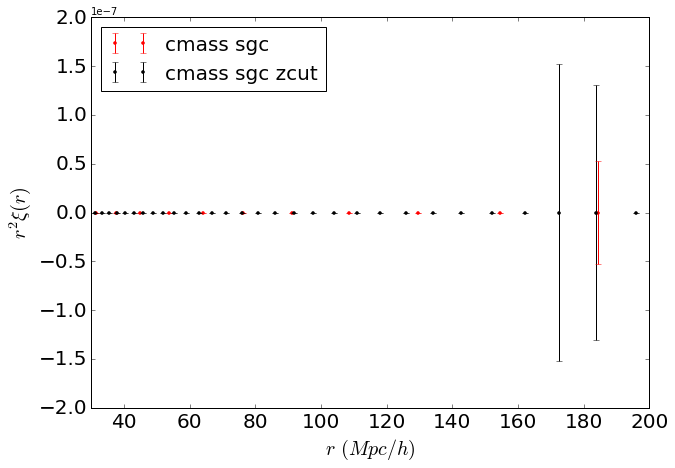

In [18]:
DAT = np.loadtxt('data_txt/cfz_comparison_cmass_sgc.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/cfz_comparison_cmass_sgc_zcut.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 7))
#ax.errorbar(dd.meanr, dd.meanr**2 * xi, yerr = varxi, fmt = '.r', label='cmass sgc')
ax.errorbar(meanr, meanr**2 * xi, yerr = xi_err, fmt = '.r', label='cmass sgc')
#ax.errorbar(meanr2*1.01, meanr2**2 * xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc zcut')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$r$ $(Mpc/h)$', size=20)
ax.set_ylabel(r'$r^2 \xi(r)$', size=20)
ax.set_xlim(30, 200)
ax.tick_params(labelsize = 20)
fig.savefig('figure/cfz_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

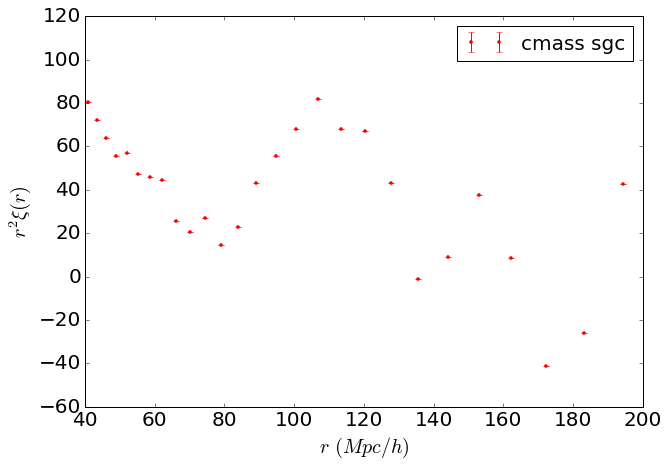

In [110]:
#DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(dd.meanr, dd.meanr**2 * xi, yerr = varxi, fmt = '.r', label='cmass sgc')
#ax.errorbar(dd.meanr,xi, yerr = varxi, fmt = '.r', label='cmass sgc')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$r$ $(Mpc/h)$', size=20)
ax.set_ylabel(r'$r^2 \xi(r)$', size=20)
ax.set_xlim(40, 200)
ax.tick_params(labelsize = 20)
#fig.savefig('figure/acf_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

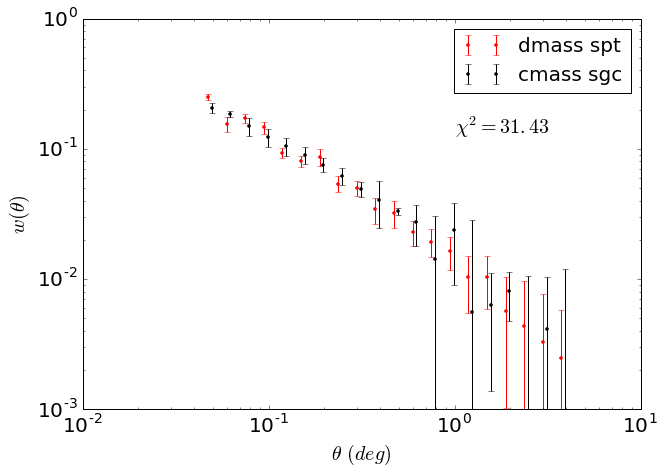

In [14]:
#DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_30_test.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
#DAT3 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
#meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')

chisqr = np.sum((xi - xi2)**2/xi_err**2 )
chisqr_dof = np.sum((xi - xi2)**2/xi_err**2 )/xi.size

ax.text(1,0.13,r'$\chi^2 = {:>0.2f}$'.format(chisqr), fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 20)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ $(deg)$', size=20)
ax.set_ylabel(r'$w(\theta)$', size=20)

ax.tick_params(labelsize = 20)
#fig.savefig('figure/acf_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

In [24]:
np.sum((xi - xi2)**2/xi_err**2 ), np.sum((xi - xi2)**2/xi_err**2 )/xi.size

(32.554344724502975, 1.6277172362251489)

In [46]:
#tree corr
from systematics_module.corr import two_point_function
#two_point_function(data = dmass_spt, rand = GoldMask_spt, ztag = 'DESDM_ZP', suffix = '_dmass_spt')
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, suffix = '_dmass_spt_rand', out = None)
w_sgc = cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = random_sgc['WEIGHT_FKP']
two_point_function(data = cmass_sgc, rand = random_sgc, njack = 2, ztag = 'Z', weight = [w_sgc, w_rand], suffix = '_cmass_sgc_z')

calculate angular correlation function
X (960, 2)  centers (2, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [468 492]
X (230831, 2)  centers (2, 2)  tol=1e-05  maxiter=200
7 iterations  cluster sizes: [106492 124339]
saving data file to :  data_txt/acf_comparison_cmass_sgc_z.txt


0

(0.001, 10.0)

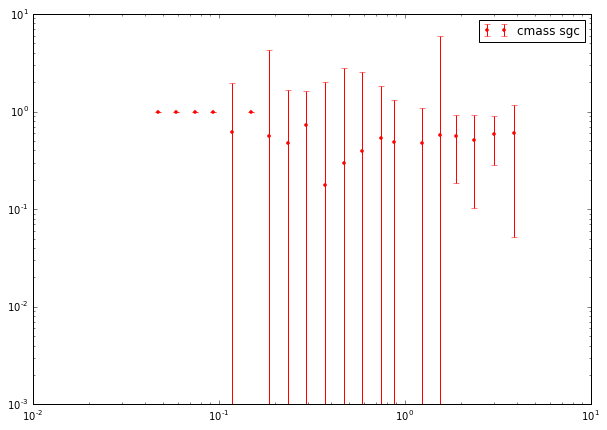

In [45]:
DAT = np.loadtxt('data_txt/acf_comparison_cmass_sgc_z.txt')
meanr, xiz, xiz_err = [DAT[:,i] for i in range(3)]
#DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc.txt')
#meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(meanr, xiz, yerr = xiz_err, fmt = '.r', label='cmass sgc')
#ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best')
ax.set_ylim(1e-3,)

In [163]:
# calling im3shape'
from cmass_modules.io import getCatalogsWithKeys
shear = getCatalogsWithKeys(keyword = 'im3shape_st82.fits', path = '/n/des/lee.5922/data/')
shear = shear[shear['INFO_FLAG'] == 0]
#shear = changeColumnName( shear, name = 'RA_AS', rename = 'RA' )
#shear = changeColumnName( shear, name = 'DEC_AS', rename = 'DEC' )
shear = Cuts.keepGoodRegion(shear)
shear = Cuts.SpatialCuts(shear, ra=320, ra2=360 , dec=-2, dec2=2 )

Spatial Cut  2108394


In [57]:
# calling cmass
cmass = io.getSGCCMASSphotoObjcat()
cmass = Cuts.keepGoodRegion(cmass)
cmass = Cuts.SpatialCuts(cmass, ra=320, ra2=360, dec=-2, dec2=2)
m1, m2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], gold_prob_cat['RA'], \
                                     gold_prob_cat['DEC'], 1./3600, maxmatch=1)
cmass_mask = np.zeros(gold_prob_cat.size, dtype=bool)
cmass_mask[m2] = 1
clean_cmass_data_des, nocmass = gold_prob_cat[cmass_mask], gold_prob_cat[~cmass_mask]


--------------------------------
 calling BOSS SGC CMASS catalog
--------------------------------
Applying Healpix BOSS SGC footprint mask
Change healpix mask to spatial cut later..... Don't forget!!! 
Spatial Cut  10331


In [15]:
#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
#bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
bins = np.linspace(0, 1/60. * 200, 201)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

bins_log = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
#bins = np.linspace(0.0, 1.5, 16)
bin_centers_log = 0.5 * (bins_log[1:] + bins_log[:-1])


#@pickle_results("correlation_functions_DMASS_st82_even.pkl")
def compute_results(data, bins = None, Nbootstraps=10,  method='landy-szalay', rseed=0):
    
    from astroML.correlation import bootstrap_two_point_angular
    
    np.random.seed(rseed)
    Nbins = bins.size
    
    results = [bins]
    results += bootstrap_two_point_angular(data['RA'], data['DEC'],bins=bins,method=method,Nbootstraps=Nbootstraps)
    return results

In [ ]:
#(bins, r_corr, r_corr_err, r_bootstraps,
# b_corr, b_corr_err, b_bootstraps) = compute_results()

(bins, c_corr, c_corr_err, c_bootstraps) = compute_results(dmass_spt, bins=bins)
(bins, d_corr, d_corr_err, d_bootstraps) = compute_results(cmass_sgc, bins=bins)

DAT = np.column_stack((bin_centers, c_corr, c_corr_err, d_corr, d_corr_err) )
np.savetxt('data_txt/corr_dmass_cmass.txt', DAT, header = 'bin_centers, c_corr2, c_corr_err2, d_corr2, d_corr_err2' )

#(bins, d_corr2, d_corr_err2, d_bootstraps2) = compute_results(dmass_st82, bins=bins)
#(bins_log, d_corr, d_corr_err, d_bootstraps) = compute_results(dmass_st82, bins=bins_log)

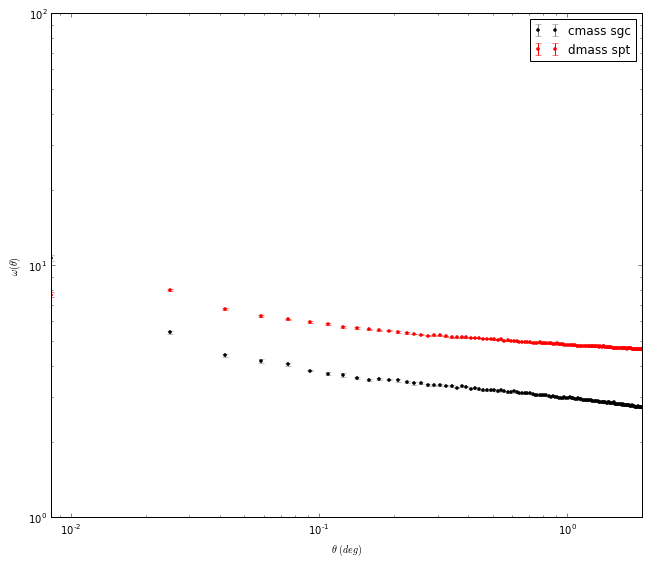

In [61]:
#------------------------------------------------------------
# Plot the results
#corr = [r_corr, b_corr]
#corr_err = [r_corr_err, b_corr_err]
#bootstraps = [r_bootstraps, b_bootstraps]



#labels = '$CMASS~in~st82$\n$N=%i$' % len(cmass)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

ax = fig.add_subplot(111, xscale='linear', yscale='linear')
ax.errorbar(bin_centers, c_corr, c_corr_err,
            fmt='.k', ecolor='gray', lw=1, label = 'cmass sgc')
ax.errorbar(bin_centers, d_corr, d_corr_err,
            fmt='.r', ecolor='red', lw=1, label='dmass spt')
#ax.errorbar(bin_centers, d_corr, d_corr_err,
#            fmt='.b', ecolor='blue', lw=1, label='cmass in des')

#t = np.array([0.01, 10])
#ax.plot(t, 10 * (t / 0.0005) ** -0.7, ':k', linewidth=1)

#ax.text(0.95, 0.95, labels,
#        ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\theta\ (deg)$')
ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xscale('linear')
#if i == 0:
#    ax.set_ylabel(r'$\hat{w}(\theta)$')
ax.legend(loc='best')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0, 2)     
plt.show()

fig.savefig('figure/acf_comparison_dmass_cmass.png')

saving fig to  figure/hist_z_cmass_st82.png
saving data to  data_txt/z_distribution_cmass_st82.txt


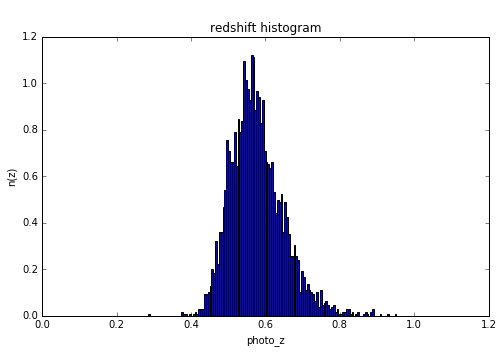

In [79]:
plot_z_distribution( cats = clean_cmass_data_des, labels = 'cmass_st82', suffix = 'cmass_st82' )

saving fig to  figure/hist_z_dmass_st82.png
saving data to  data_txt/z_distribution_dmass_st82.txt


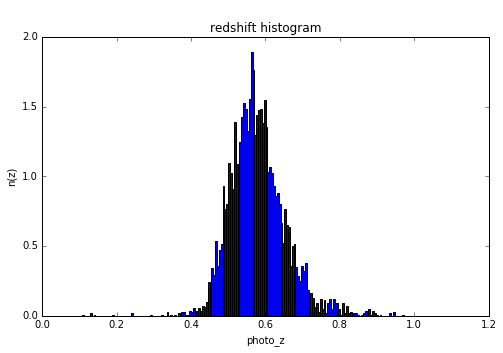

In [80]:
plot_z_distribution( cats = dmass_st82, labels = 'dmass_st82', suffix = 'dmass_st82' )

In [75]:
plot_z_distribution( cats = dmass_st82, labels = 'dmass_st82', suffix = 'dmass_st82' )

NameError: name 'plot_z_distribution' is not defined

In [ ]:
plot_z_distribution( cats = dmass_st82, labels = '_dmass_st82', suffix = 'dmass_st82_binedge' )

In [58]:
dmass_st82.shape

(5487,)

In [59]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    mu, sigma = np.mean(data['DESDM_ZP']), np.std(data['DESDM_ZP'])
    z_R = np.random.normal(mu, sigma, size)
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float'), ('DESDM_ZP', 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
    data_R['DESDM_ZP'] = z_R
                              
    return data_R

data_R = uniform_random_on_sphere(dmass_st82, size = 100 * dmass_st82.size)
data_R = Cuts.keepGoodRegion(data_R)
data_R_t = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * cmass.size)
data_R_t = Cuts.keepGoodRegion(data_R_t)

In [60]:
data_R.size, dmass_st82.size

(44215, 5487)

In [63]:
from systematics_module.corr import angular_correlation,cross_angular_correlation
#angular_correlation(data = dmass_st82, rand = data_R, weight = None, suffix = '_dmass_st82', out = None)
#angular_correlation(data = clean_cmass_data_des, rand = data_R_t, weight = None, suffix = '_cmass_st82', out = None)
cross_angular_correlation(data = clean_cmass_data_des, data2 = dmass_st82, rand = data_R_t, rand2= data_R, njack = 30,\
                          weight = None, suffix = '_cmass_dmass_st82', out=None)

X (300, 2)  centers (30, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [11  9  9 13 12 22  8  9 11 10  6  4 10 14 14 10  7 12 11  4 10  6  8 18  9
 11  6  5  9 12]
X (3420, 2)  centers (30, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [ 86 138  93 126 121 213  54 122 175  61  78  88 107 167 107  73 110 126
 158  46  60 111 108 129 140 133 143  70 107 170]
saving data file to :  data_txt/acf_cross_cross_st82.txt


In [66]:
cp data_txt/acf_cross_cross_st82.txt data_txt/acf_cross_cmass_dmass_st82.txt

In [70]:
DAT = np.loadtxt('data_txt/acf_comparison_dmass_st82.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_st82.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
DAT3 = np.loadtxt('data_txt/acf_cross_cmass_dmass_st82.txt')
meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

In [71]:
dmass_st82.size, clean_cmass_data_des.size

(5487, 3420)

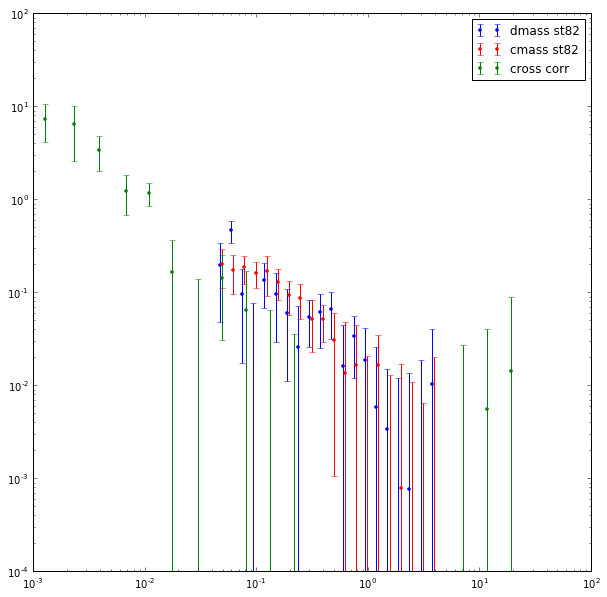

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.b', label='dmass st82')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.r', label='cmass st82')
ax.errorbar(meanr3*1.1, xi3, yerr = xi_err3, fmt = '.g', label='cross corr')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best')

Lensing 

In [ ]:
source_R = uniform_random_on_sphere(shear, size = shear.size)
source_R = Cuts.keepGoodRegion(source_R)

In [192]:
from systematics_module.corr import LensingSignal, cross_angular_correlation, angular_correlation
LensingSignal(lense = clean_cmass_data_des, source = shear, rand = data_R, suffix = 'cmass')
LensingSignal(lense = dmass_st82, source = shear, rand = data_R, suffix = 'dmass')

Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (179, 2)  centers (10, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [13 19 13 26 16 12 21 14 25 20]
X (8013, 2)  centers (10, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [811 668 827 863 702 770 830 826 919 797]
saving data file to :  data_txt/lensing_cmass.txt
Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (173, 2)  centers (10, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [17  6 15 24 16 15 16 21 28 15]
X (7564, 2)  centers (10, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [ 662  521  501  913  958  621  714  763 1090  821]
saving data file to :  data_txt/lensing_dmass.txt


saving fig to : figure/lensing_comparison.png


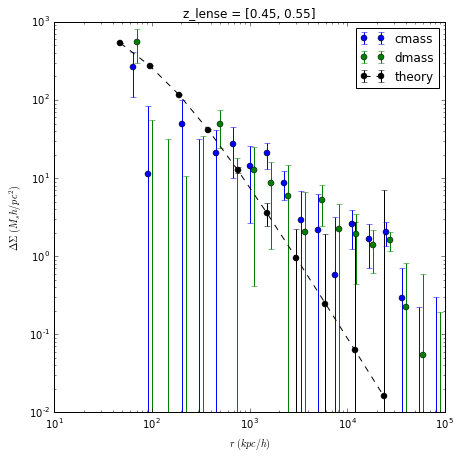

In [193]:
# plotting

labels = ['cmass', 'dmass']
lensingdat = [np.loadtxt('data_txt/lensing_'+s+'.txt') for s in labels ]

#r_p_bins, LensSignal, LSjkerr, correctedLensSignal, CLSjkerr, BoostFactor, Boostjkerr = lensingdat[:,0], lensingdat[:,1],lensingdat[:,2],lensingdat[:,3],lensingdat[:,4],lensingdat[:,5],lensingdat[:,6]
fig, ax = plt.subplots(1,1, figsize = (7,7))

for j in range(len(labels)):

    r_p_bins, LensSignal, LSjkerr = [lensingdat[j][:,i] for i in range(lensingdat[0][0].size)]
    ax.errorbar(r_p_bins * (1 + 0.1*j), LensSignal, yerr = LSjkerr, fmt='o', label = labels[j])

theory = np.loadtxt('data_txt/smd_v_theta_cmass.dat')
rr_the = theory[:,0]
delta_sigma_the = theory[:,1]
error_the = theory[:,2] * np.sqrt(5000/120)
ax.errorbar(10**rr_the, 10**delta_sigma_the, yerr = 10**error_the, color = 'black', fmt='--o', label = 'theory')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 1e5)
ax.set_ylim(1e-2,1e3)
ax.set_xlabel(r'$r$ $(kpc/h)$')
ax.set_ylabel(r'$\Delta\Sigma$ $(M_{s}h/pc^{2})$')
ax.set_title('z_lense = [0.45, 0.55]'  )
ax.legend(loc = 'best')

figname='figure/lensing_comparison.png'
fig.savefig(figname)
print 'saving fig to :', figname